                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

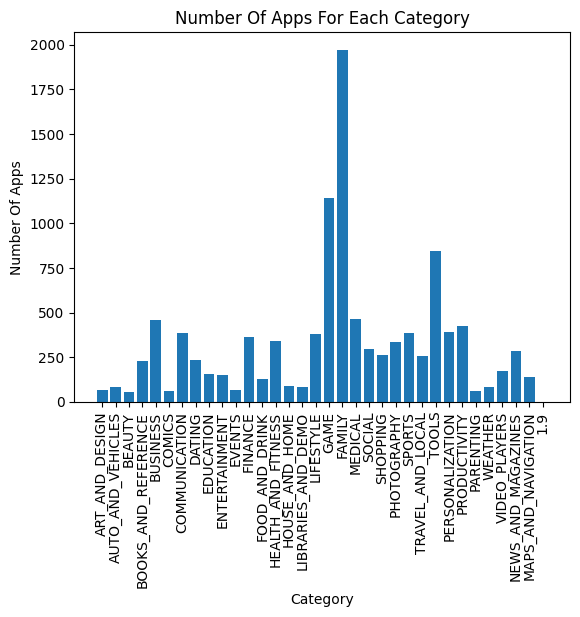

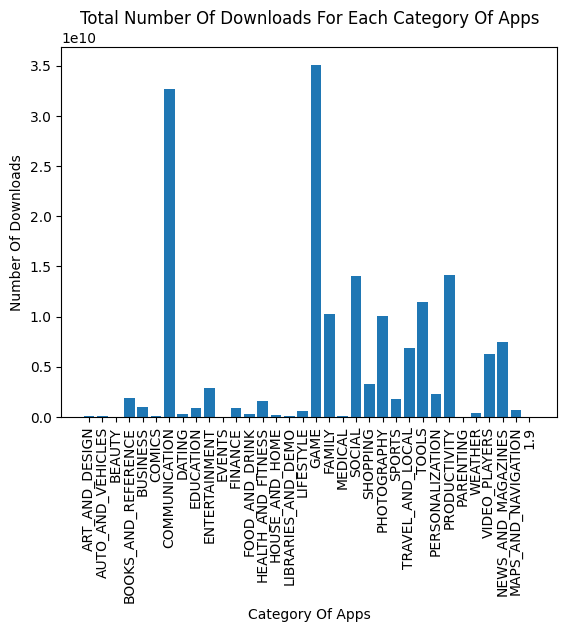

                     Installs
Content Rating               
Adults only 18+  2.000000e+06
Earlier Empty    0.000000e+00
Everyone         1.141567e+11
Everyone 10+     1.323388e+10
Mature 17+       5.524491e+09
Teen             3.471635e+10
Unrated          5.050000e+04


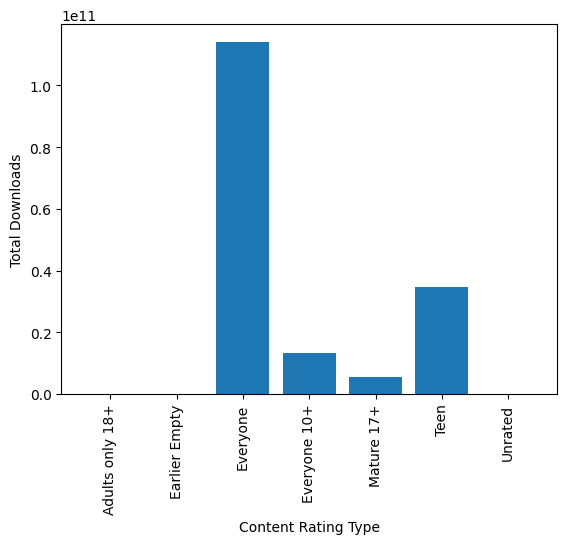

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

a = pd.read_csv("C:/Users/Sonu/OneDrive/Desktop/googleplaystore.csv")

df = pd.DataFrame(a)
print(df)

print(a.info())
a.describe()

print(a.isnull().sum())

print(a["App"].duplicated().sum())

print(a.drop_duplicates("App"))

df[["Type", "Content Rating","Current Ver","Android Ver"]] = df[["Type", "Content Rating","Current Ver","Android Ver"]].fillna("Earlier Empty")

mean_value = df["Rating"].mean()

print(mean_value)

df.fillna({"Rating":mean_value},inplace=True)
print(df)

# Remove commas and plus signs
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',', '').str.replace('+', ''), errors='coerce')

# Fill NaN values with 0 or another placeholder if needed
df['Installs'] = df['Installs'].fillna(0)

print(df)



gb = df.groupby("Category").agg({"Installs":["count","sum"]})
print(gb)


# #adding new columns
gb.columns = ["Number of apps for this category", "Total installs for this category of apps"]
gb = gb.reset_index()
df = df.merge(gb, on = "Category", how = "left")
print(df)

#visualisation
plt.bar(df["Category"], df["Number of apps for this category"])
plt.xticks(rotation = 90)
plt.xlabel("Category")
plt.ylabel("Number Of Apps")
plt.title("Number Of Apps For Each Category")
plt.show()




plt.bar(df["Category"],df["Total installs for this category of apps"])
plt.xticks(rotation = 90)
plt.xlabel("Category Of Apps")
plt.ylabel("Number Of Downloads")
plt.title("Total Number Of Downloads For Each Category Of Apps")
plt.show()


#now calculating total installs based on content rating - everyone, teen, mature(17+)

gb1 = df.groupby("Content Rating").agg({"Installs":"sum"})
print(gb1)


#visualising
plt.bar(gb1.index, gb1["Installs"])
plt.xticks(rotation = 90)
plt.xlabel("Content Rating Type")
plt.ylabel("Total Downloads")
plt.show()